# General imports

In [29]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

%matplotlib inline
import cv2

In [4]:
COLOR = '#62d197'

# Data

In [5]:
# charge from pickle file
data = pd.read_pickle('../../data/cleaned_df.pkl')

images_df = data[['image', 'main_category', 'category_code']].copy()
images_df.head()

image    main_category  category_code
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg  Home Furnishing              6
1  7b72c92c2f6c40268628ec5f14c6d590.jpg        Baby Care              5
2  64d5d4a258243731dc7bbb1eef49ad74.jpg        Baby Care              5
3  d4684dcdc759dd9cdf41504698d737d8.jpg  Home Furnishing              6
4  6325b6870c54cd47be6ebfbffa620ec7.jpg  Home Furnishing              6

In [6]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          1050 non-null   object
 1   main_category  1050 non-null   object
 2   category_code  1050 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 24.7+ KB


In [7]:
images_df.groupby('main_category').count().reset_index()

main_category  image  category_code
0                   Baby Care    150            150
1    Beauty and Personal Care    150            150
2                   Computers    150            150
3  Home Decor & Festive Needs    150            150
4             Home Furnishing    150            150
5            Kitchen & Dining    150            150
6                     Watches    150            150

In [8]:
classes = images_df['main_category'].unique()

In [9]:
def list_fct(name):
    list_img = images_df['image'].tolist()
    list_image_name = [list_img[i] for i in range(len(images_df)) if images_df['main_category'][i] == name]
    return list_image_name



for category in classes:
    print(f'Category: {category}')
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename =

SyntaxError: invalid syntax (3012401548.py, line 12)

# EDA

In [10]:
# Path to images folder
path = '../../data/Flipkart/Images/'

### Functions

In [11]:
def list_fct(category:str, image: str, path:str=path):
    list_image_name = [path + image[i] for i in range(len(images_df)) if images_df['main_category'][i] == category]
    return list_image_name

def extract_img_features(image, flag: object = cv2.IMREAD_COLOR, images_path: str = path) -> pd.DataFrame:
    """Extract image features from a list of images.

    Args:
        image (str): the name of the image
        flag (object): the flag to read the images (default: cv2.IMREAD_COLOR)
        images_path (str): the path to the images (default: path)
    Returns:
        m
    """
    try:
        image = cv2.imread(images_path + image, flag) # returns an array [height, width, channels]
        return image.shape[0], image.shape[1], image.shape[2], image.size
    except Exception as e:
        print(f'Error reading image: {image}')
        print(f'Error: {e}')
        return  None * 4

## Images features

In [12]:
images_df['height'], images_df['width'], images_df['channels'], images_df['size'] = zip(*images_df['image'].apply(extract_img_features))
images_df.tail(4)

image main_category  category_code  \
1046  fd6cbcc22efb6b761bd564c28928483c.jpg     Baby Care              5   
1047  5912e037d12774bb73a2048f35a00009.jpg     Baby Care              5   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg     Baby Care              5   
1049  f2f027ad6a6df617c9f125173da71e44.jpg     Baby Care              5   

      height  width  channels     size  
1046    1200    900         3  3240000  
1047    1011   1100         3  3336300  
1048    1200    900         3  3240000  
1049    1100   1100         3  3630000

In [13]:
images_df.describe()

category_code        height        width  channels          size
count    1050.000000   1050.000000  1050.000000    1050.0  1.050000e+03
mean        3.000000   1220.038095  1196.570476       3.0  5.748901e+06
std         2.000953    744.841368   864.076765       0.0  1.175770e+07
min         0.000000    160.000000   145.000000       3.0  1.740000e+05
25%         1.000000    844.000000   747.250000       3.0  2.017125e+06
50%         3.000000   1100.000000  1100.000000       3.0  3.047550e+06
75%         5.000000   1360.000000  1214.250000       3.0  4.661820e+06
max         6.000000  11042.000000  8484.000000       3.0  2.810410e+08

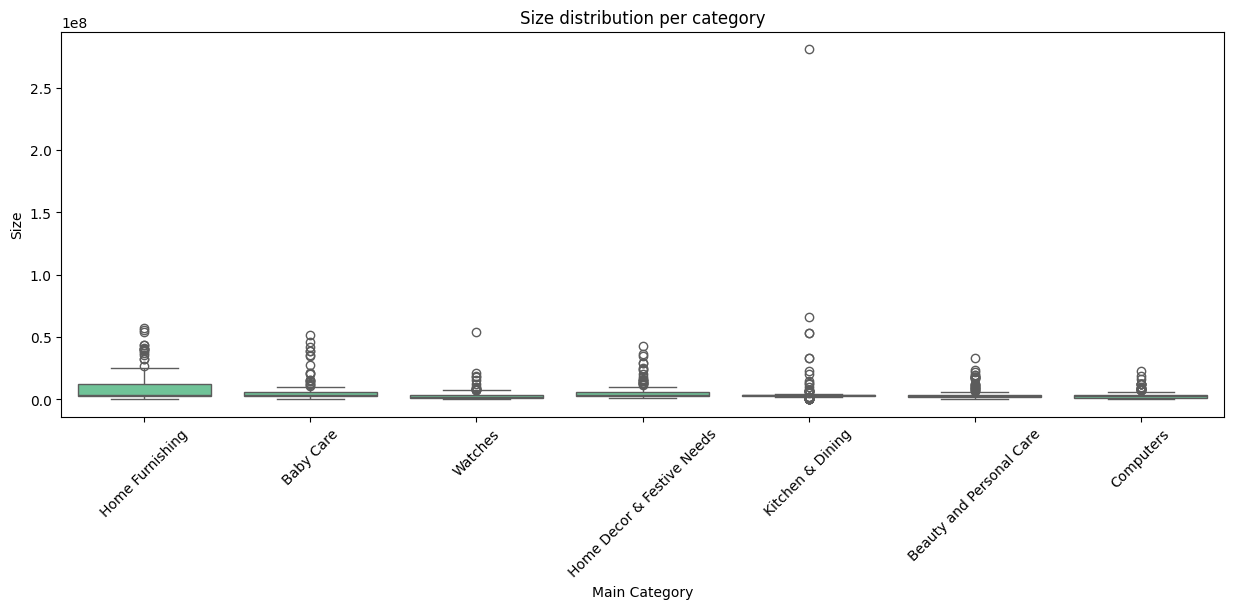

In [14]:
# Display stats per categories
plt.figure(figsize=(15, 5))
sns.boxplot(x='main_category', y='size', data=images_df, color=COLOR)
plt.title('Size distribution per category')
plt.xlabel('Main Category')
plt.ylabel('Size')
plt.xticks(rotation=45)
plt.show()

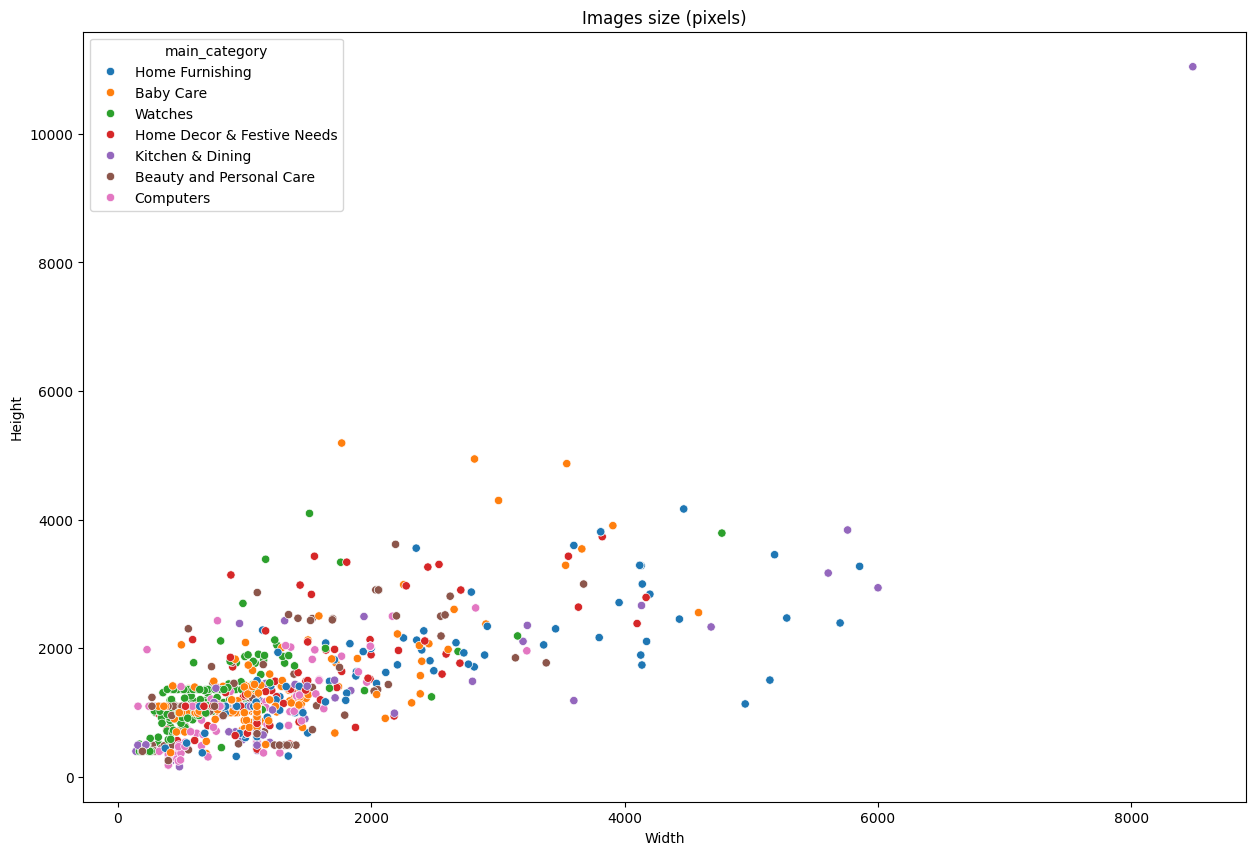

In [15]:
# Scatter plot of the witgh and length of the images
plt.figure(figsize=(15, 10))
sns.scatterplot(x='width', y='height', data=images_df, color=COLOR, hue='main_category')
plt.title('Images size (pixels)')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

Pictures are all in colors with high definition (mean of 1200 pixels). We observe an outlier for the category Kitchen and dining.

## Display few images

Category: Home Furnishing


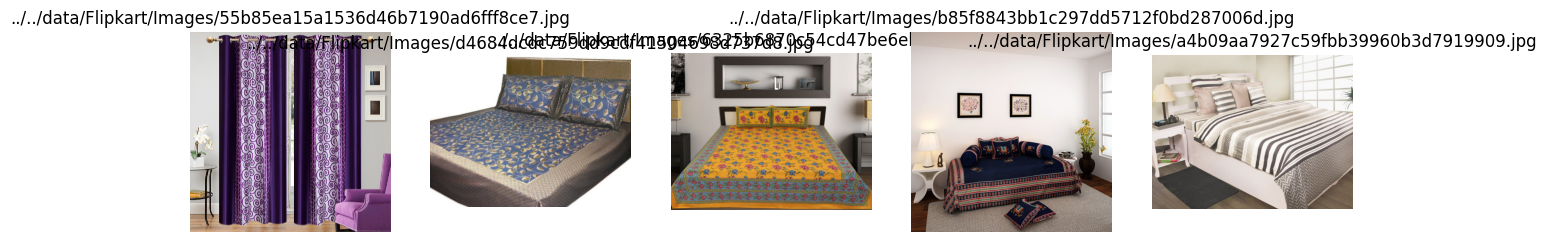

Category: Baby Care


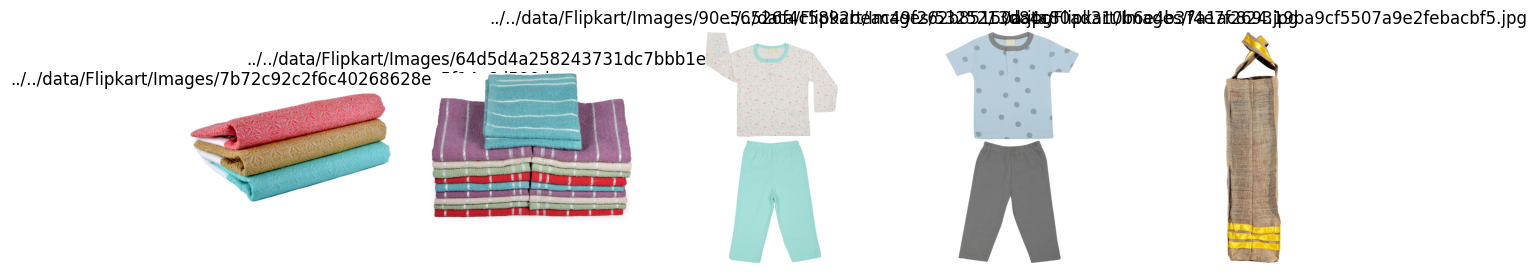

Category: Watches


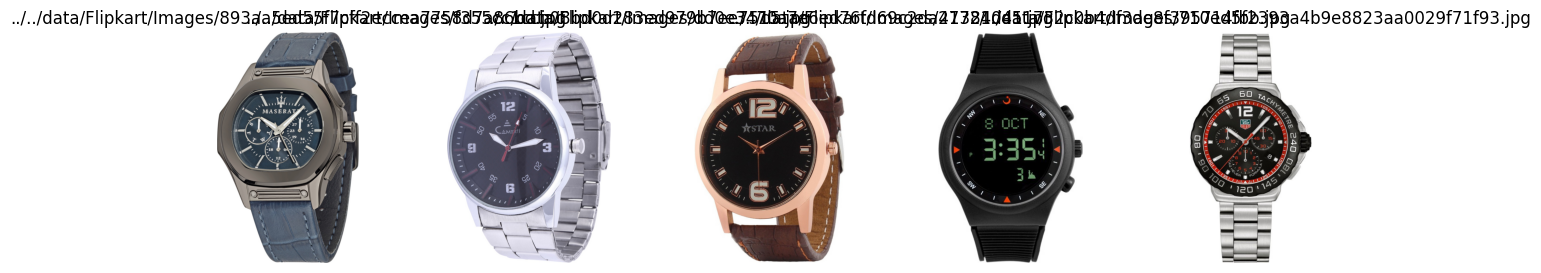

Category: Home Decor & Festive Needs


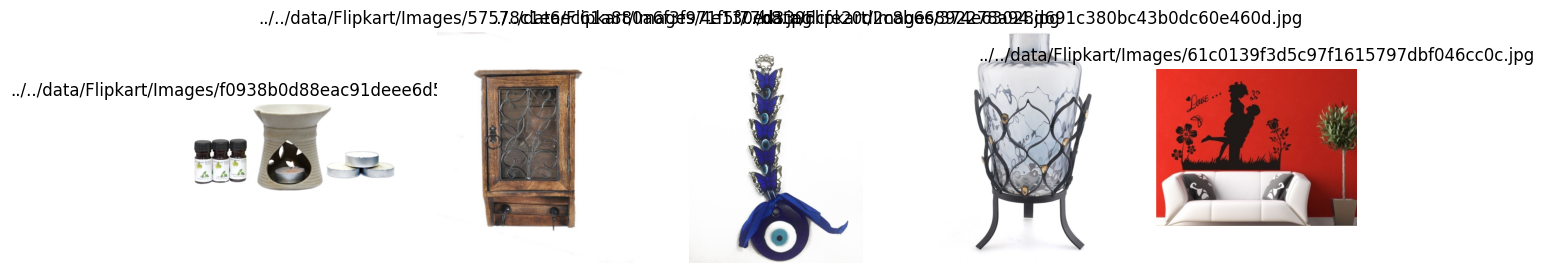

Category: Kitchen & Dining


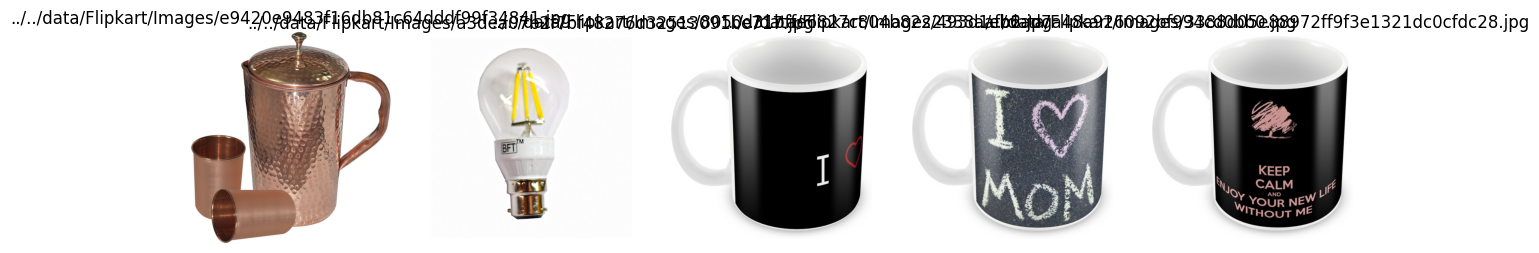

Category: Beauty and Personal Care


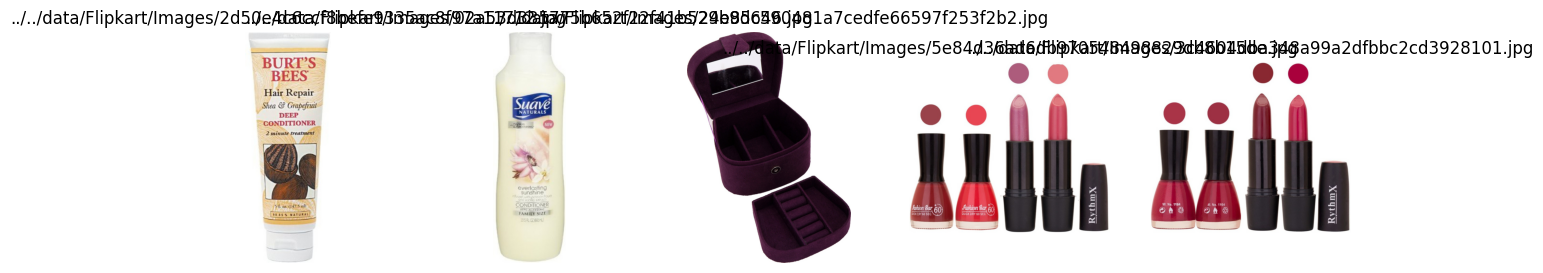

Category: Computers


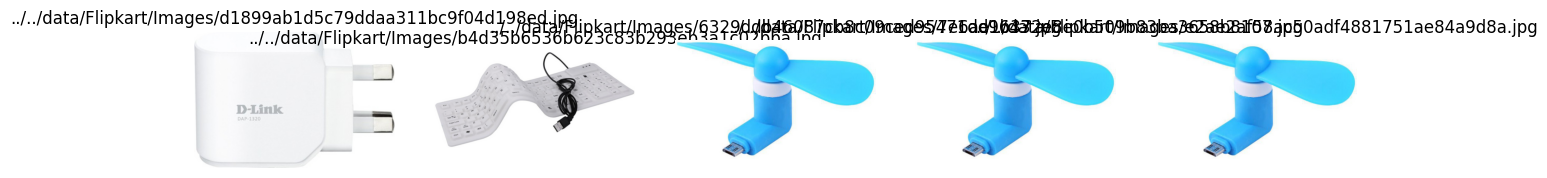

In [16]:
for category in classes:
    print(f'Category: {category}')
    images_pathes = list_fct(category, images_df['image'])

    plt.figure(figsize=(15, 3))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        filename = images_pathes[i]
        image = imread(filename)
        plt.imshow(image)
        plt.title(filename)
        plt.axis('off')
    plt.show()

# Features extraction

## Functions

In [55]:
def resize_img(image: str, max_size: int, greyscale: bool=False) -> object:
    """Resize an image to a specific width and height. Change the image scale if needed.

    Args:
        image (str): the name of the image
        width (int): the width of the image (default: 300)
        height (int): the height of the image (default: 300)
        greyscale (bool): convert the image to greyscale (default: False)
    Returns:
        image (array): the resized image
    """
    # Calculate a resizing ratio to keep the original image aspect ratio
    ratio = max_size / max(image.shape[0], image.shape[1])
    width = int(image.shape[0] * ratio)
    height = int(image.shape[1] * ratio)
    try:
        print(f'Width: {width}, Height: {height}')
        image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

        if greyscale:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Clean created variables
        del(ratio, height, width)

        return image
    except Exception as e:
        print(f'Error resizing image: {image}')
        print(f'Error: {e}')
        return None

In [41]:
def extract_descriptors(img):
    """Extract descriptors from images.

    Args:
        data (pd.DataFrame): the dataframe containing the images
        path (str): the path to the images
        max_size (int): the maximum size of the images (default: None)
        resize (bool): resize the images (default: False)
        flag (object): the flag to read the images (default: cv2.IMREAD_COLOR)
    Returns:
        list: the descriptors of the images
    """
    try:
        # Instantiate the SIFT object
        sift = cv2.SIFT_create()
        # Detect and compute the descriptors
        keypoints , descriptors = sift.detectAndCompute(img, None)
        return keypoints, descriptors
    except Exception as e:
        print(f'Error reading image: {image}')
        print(f'Error: {e}')
        return None, None


In [52]:
def display_keypoints(data: pd.DataFrame= images_df, path: str=path, resize: int=None, greyscale: bool=False):
    """Display the keypoints of the images.

    Args:
        data (pd.DataFrame): the dataframe containing the images (default: images_df)
        path (str): the path to the images (default: path)
        resize (int): limit the size of width or height in pixels (default: None)
        greyscale (bool): convert the image to greyscale (default: False)
        flag (object): the flag to read the images (default: cv2.IMREAD_COLOR)
    """
    category_count = {}
    for row in tqdm(data.itertuples()):
        category = row.main_category
        if category_count.get(category,0) < 1:
            # Read the image
            image = cv2.imread(path + row.image, cv2.IMREAD_COLOR)

            if resize:
                image = resize_img(image, resize)
            if greyscale:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            keypoints, descriptors = extract_descriptors(image)

            # display the image
            img_with_keypoints = cv2.drawKeypoints(image, keypoints, None)
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
            plt.title(f'Category {category}')
            plt.axis('off')
            plt.show()

            # Diplay number of keypoints and descriptors size
            print(f'Image: {row.image}')
            print(f'Number of keypoints: {len(keypoints)}')
            print(f"Descriptors size: {descriptors.shape if descriptors is not None else 'None'}")

            category_count[category] = category_count.get(category, 0) + 1

## SIFT & Visual Bag of Words

Interesting source on [youtube](https://www.youtube.com/watch?v=4AvTMVD9ig0)

Scale-Invariant Feature Transform is a way for describing a local area in an image through a **feature vector**.

The goal is to reduce an image content into a set of locally distinct points called **descriptors**, that we will try to find in other images.

When a keypoint is found, we look in its neighborhood for intensity changes, gradient changes value of this area in order to describe it into a descriptor vector. So the descriptor is the vector discribing the surrondings of that point.

When comparing several images with same keypoints, it is possible to compare descriptors and make data associations between those images.

The keypoints are found using a **difference of Gaussian approach** which consist to take an image and blur it using a Gaussian blur at different magnetude. Then we substract the images from each other. After stacking thoses differences, we try to spot extreme points ==> Keypoints. It is also possible to apply different scales to the image to find these extreme points.

After finding the keypoint, we need to compute the descriptor by looking the neighborhood of the KP by breaking it in small parts and compute the gradient of these small areas. Gradient of local area are then collected into histograms to visualize how often certain gradient occur, what is their magnitude.

0it [00:00, ?it/s]

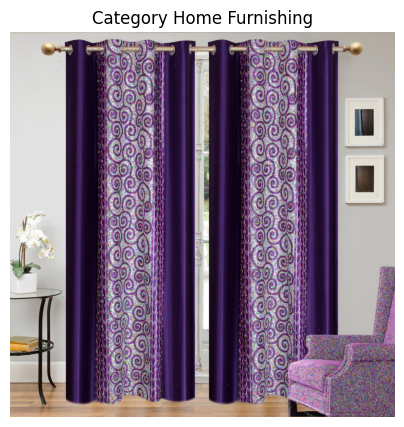

1it [00:01,  1.40s/it]

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 93042
Descriptors size: (93042, 128)


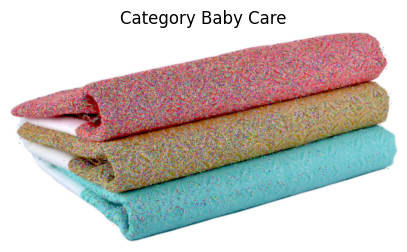

2it [00:01,  1.29it/s]

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 25446
Descriptors size: (25446, 128)


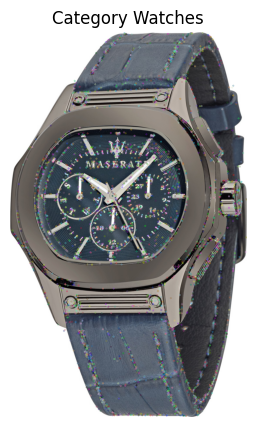

6it [00:01,  4.68it/s]

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 4493
Descriptors size: (4493, 128)


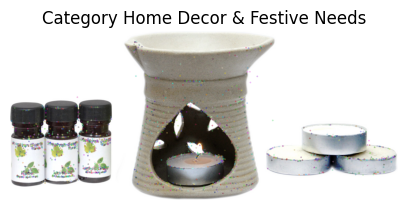

37it [00:02, 36.18it/s]

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 2104
Descriptors size: (2104, 128)


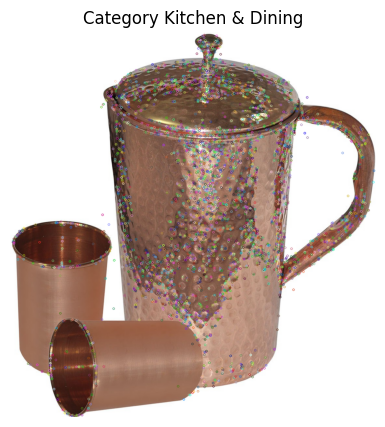

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 4061
Descriptors size: (4061, 128)


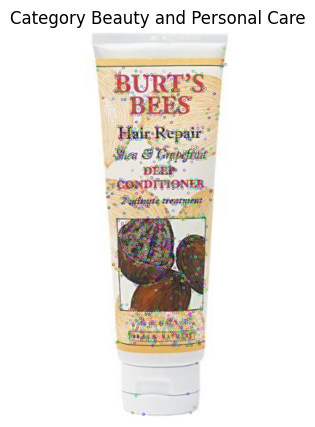

45it [00:02, 35.55it/s]

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 2176
Descriptors size: (2176, 128)


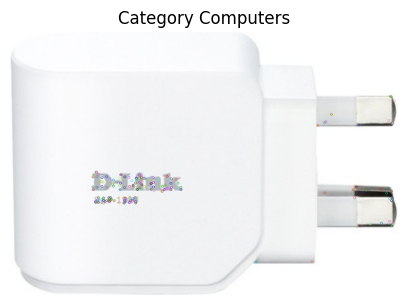

1050it [00:02, 431.74it/s]

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 202
Descriptors size: (202, 128)


In [43]:
display_keypoints()

0it [00:00, ?it/s]

Ratio: 0.08333333333333333
Width: 300, Height: 300


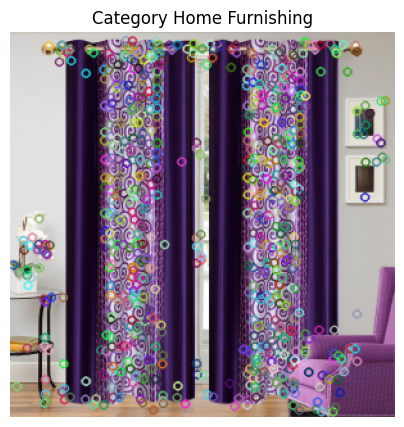

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 694
Descriptors size: (694, 128)
Ratio: 0.12562814070351758
Width: 162, Height: 300


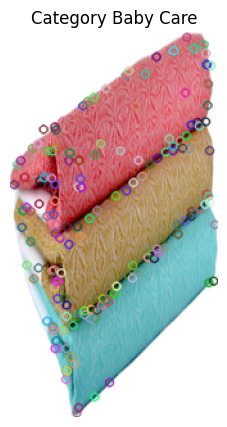

2it [00:00, 13.51it/s]

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 175
Descriptors size: (175, 128)
Ratio: 0.1694915254237288
Width: 300, Height: 184


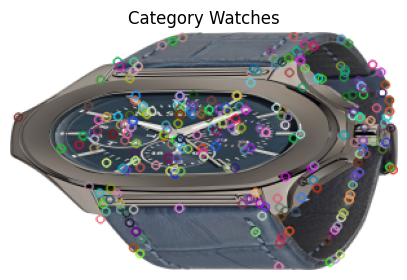

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 289
Descriptors size: (289, 128)
Ratio: 0.13748854262144822
Width: 130, Height: 300


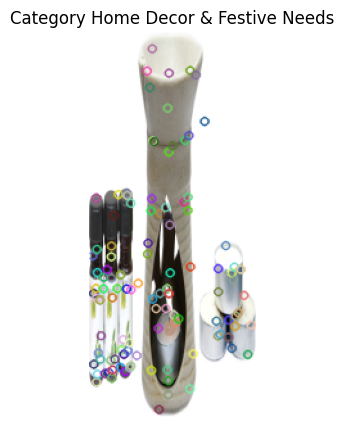

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 136
Descriptors size: (136, 128)
Ratio: 0.2533783783783784
Width: 300, Height: 284


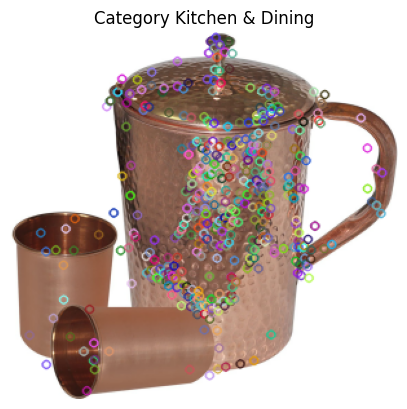

38it [00:00, 141.54it/s]

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 456
Descriptors size: (456, 128)
Ratio: 0.2727272727272727
Width: 300, Height: 111


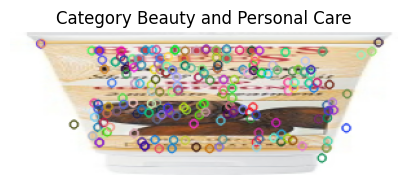

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 224
Descriptors size: (224, 128)
Ratio: 0.2727272727272727
Width: 203, Height: 300


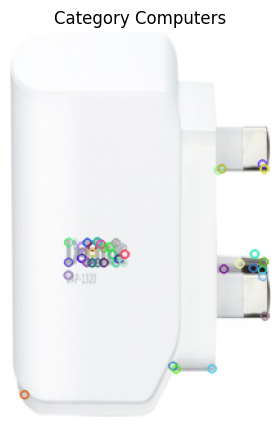

1050it [00:00, 2797.49it/s]

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 55
Descriptors size: (55, 128)


In [53]:
# Resizing the images
display_keypoints(resize=300)

0it [00:00, ?it/s]

Width: 300, Height: 300


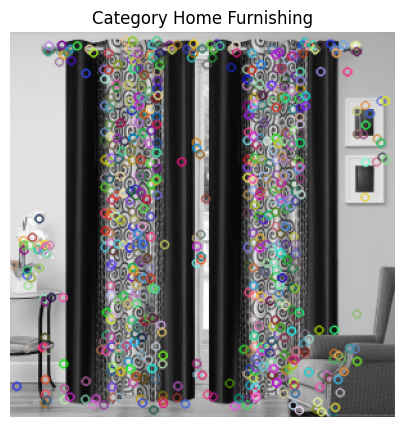

Image: 55b85ea15a1536d46b7190ad6fff8ce7.jpg
Number of keypoints: 694
Descriptors size: (694, 128)
Width: 162, Height: 300


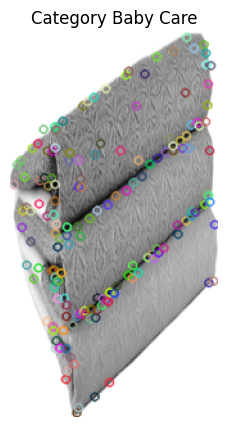

2it [00:00, 13.37it/s]

Image: 7b72c92c2f6c40268628ec5f14c6d590.jpg
Number of keypoints: 175
Descriptors size: (175, 128)
Width: 300, Height: 184


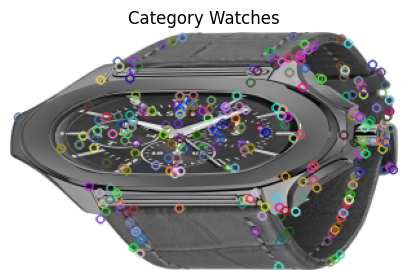

Image: 893aa5ed55f7cff2eccea7758d7a86bd.jpg
Number of keypoints: 289
Descriptors size: (289, 128)
Width: 130, Height: 300


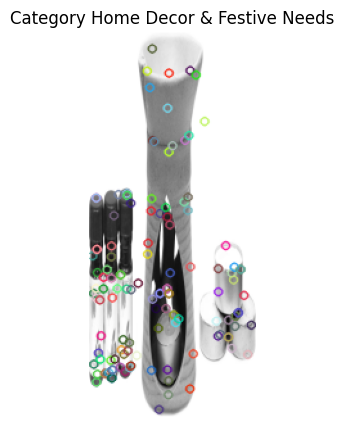

Image: f0938b0d88eac91deee6d5add54097d3.jpg
Number of keypoints: 136
Descriptors size: (136, 128)
Width: 300, Height: 284


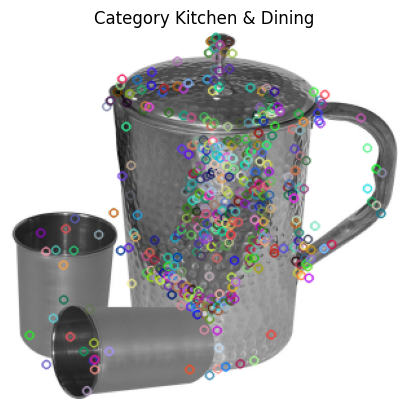

38it [00:00, 141.74it/s]

Image: e9420e9483f16db81c64dddf99f34841.jpg
Number of keypoints: 456
Descriptors size: (456, 128)
Width: 300, Height: 111


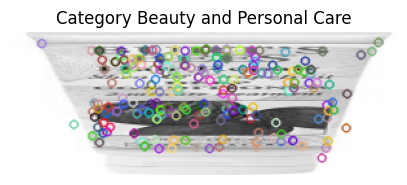

Image: 2d50e4c6ccf8befe9335ac8f97a11712.jpg
Number of keypoints: 224
Descriptors size: (224, 128)
Width: 203, Height: 300


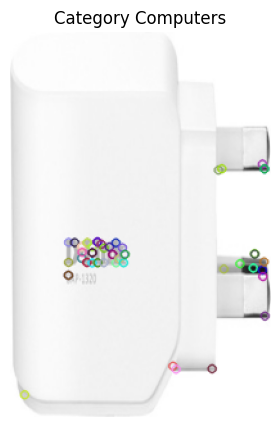

1050it [00:00, 2795.33it/s]

Image: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Number of keypoints: 55
Descriptors size: (55, 128)


In [56]:
display_keypoints(resize=300, greyscale=True)

The number of keypoints change according to the resolution of the image. A better resolution image results with a larger amount of keypoints, which means a  better detail of the image. However, it also implies a lot more image features and a bigger demand in computing ressources and time.
